In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [32]:
df = pd.read_csv('big5_24jan2025.csv')
df

,Rk,Squad,Comp,# Pl,Age,Poss,MP,Gls,Ast,G+A,...,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Shots,SoT,SoT%,ShotsA,SoTA,SoTA%
0,1,Alavés,es La Liga,25,27.1,43.8,20,1.20,0.60,1.80,...,80.2,35.0,74.8,46.8,10.6,3.30,31.1,9.95,3.70,37.2
1,2,Angers,fr Ligue 1,23,28.1,42.8,18,1.11,0.72,1.83,...,84.9,29.8,58.1,51.3,10.1,3.28,32.6,12.80,5.39,42.0
2,3,Arsenal,eng Premier League,24,26.4,55.5,22,1.86,1.45,3.32,...,88.5,30.0,56.8,52.8,13.9,4.86,35.0,10.40,3.23,31.0
3,4,Aston Villa,eng Premier League,23,27.6,49.7,22,1.45,1.14,2.59,...,89.1,29.4,53.8,54.6,12.4,3.86,31.1,11.80,4.05,34.2
4,5,Atalanta,it Serie A,28,27.3,56.4,21,2.14,1.52,3.67,...,89.0,40.2,66.2,60.7,14.8,5.19,35.0,10.20,3.90,38.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Villarreal,es La Liga,26,27.8,48.7,20,1.80,1.20,3.00,...,87.3,38.9,66.6,58.3,14.3,4.55,31.7,11.40,3.80,33.2
92,93,Werder Bremen,de Bundesliga,22,28.0,51.2,18,1.72,1.33,3.06,...,86.2,41.9,71.6,58.6,12.1,4.06,33.6,13.90,4.61,33.1
93,94,West Ham,eng Premier League,26,28.9,46.9,22,1.18,0.68,1.86,...,86.3,37.4,68.9,54.3,13.6,3.73,27.3,16.40,5.36,32.7
94,95,Wolfsburg,de Bundesliga,22,25.7,42.6,18,2.17,1.44,3.61,...,83.6,39.2,75.4,51.9,12.5,4.28,34.2,14.30,5.17,36.0


In [33]:
df.columns

Index(['Rk', 'Squad', 'Comp', '# Pl', 'Age', 'Poss', 'MP', 'Gls', 'Ast', 'G+A',
       'G-PK', 'PK', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'GlsA', 'xGA', 'npxGA', 'PrgCA', 'PrgPA', 'CmpPass', 'AttPass',
       'PassCmp%', 'ShortPassCmp', 'ShortPassAtt', 'ShortPassCmp%',
       'MedPassCmp', 'MedPassAtt', 'MedPassCmp%', 'LongPassCmp', 'LongPassAtt',
       'LongPassCmp%', 'Shots', 'SoT', 'SoT%', 'ShotsA', 'SoTA', 'SoTA%'],
      dtype='object')

In [34]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.drop(['Rk', '# Pl'], axis=1, inplace=True)

In [35]:
numeric_df.head()

,Age,Poss,MP,Gls,Ast,G+A,G-PK,PK,CrdY,CrdR,...,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Shots,SoT,SoT%,ShotsA,SoTA,SoTA%
0,27.1,43.8,20,1.20,0.60,1.80,1.00,0.20,2.70,0.10,...,80.2,35.0,74.8,46.8,10.6,3.30,31.1,9.95,3.70,37.2
1,28.1,42.8,18,1.11,0.72,1.83,0.94,0.17,1.39,0.06,...,84.9,29.8,58.1,51.3,10.1,3.28,32.6,12.80,5.39,42.0
2,26.4,55.5,22,1.86,1.45,3.32,1.77,0.09,2.27,0.14,...,88.5,30.0,56.8,52.8,13.9,4.86,35.0,10.40,3.23,31.0
3,27.6,49.7,22,1.45,1.14,2.59,1.36,0.09,2.18,0.09,...,89.1,29.4,53.8,54.6,12.4,3.86,31.1,11.80,4.05,34.2
4,27.3,56.4,21,2.14,1.52,3.67,2.00,0.14,2.00,0.00,...,89.0,40.2,66.2,60.7,14.8,5.19,35.0,10.20,3.90,38.3


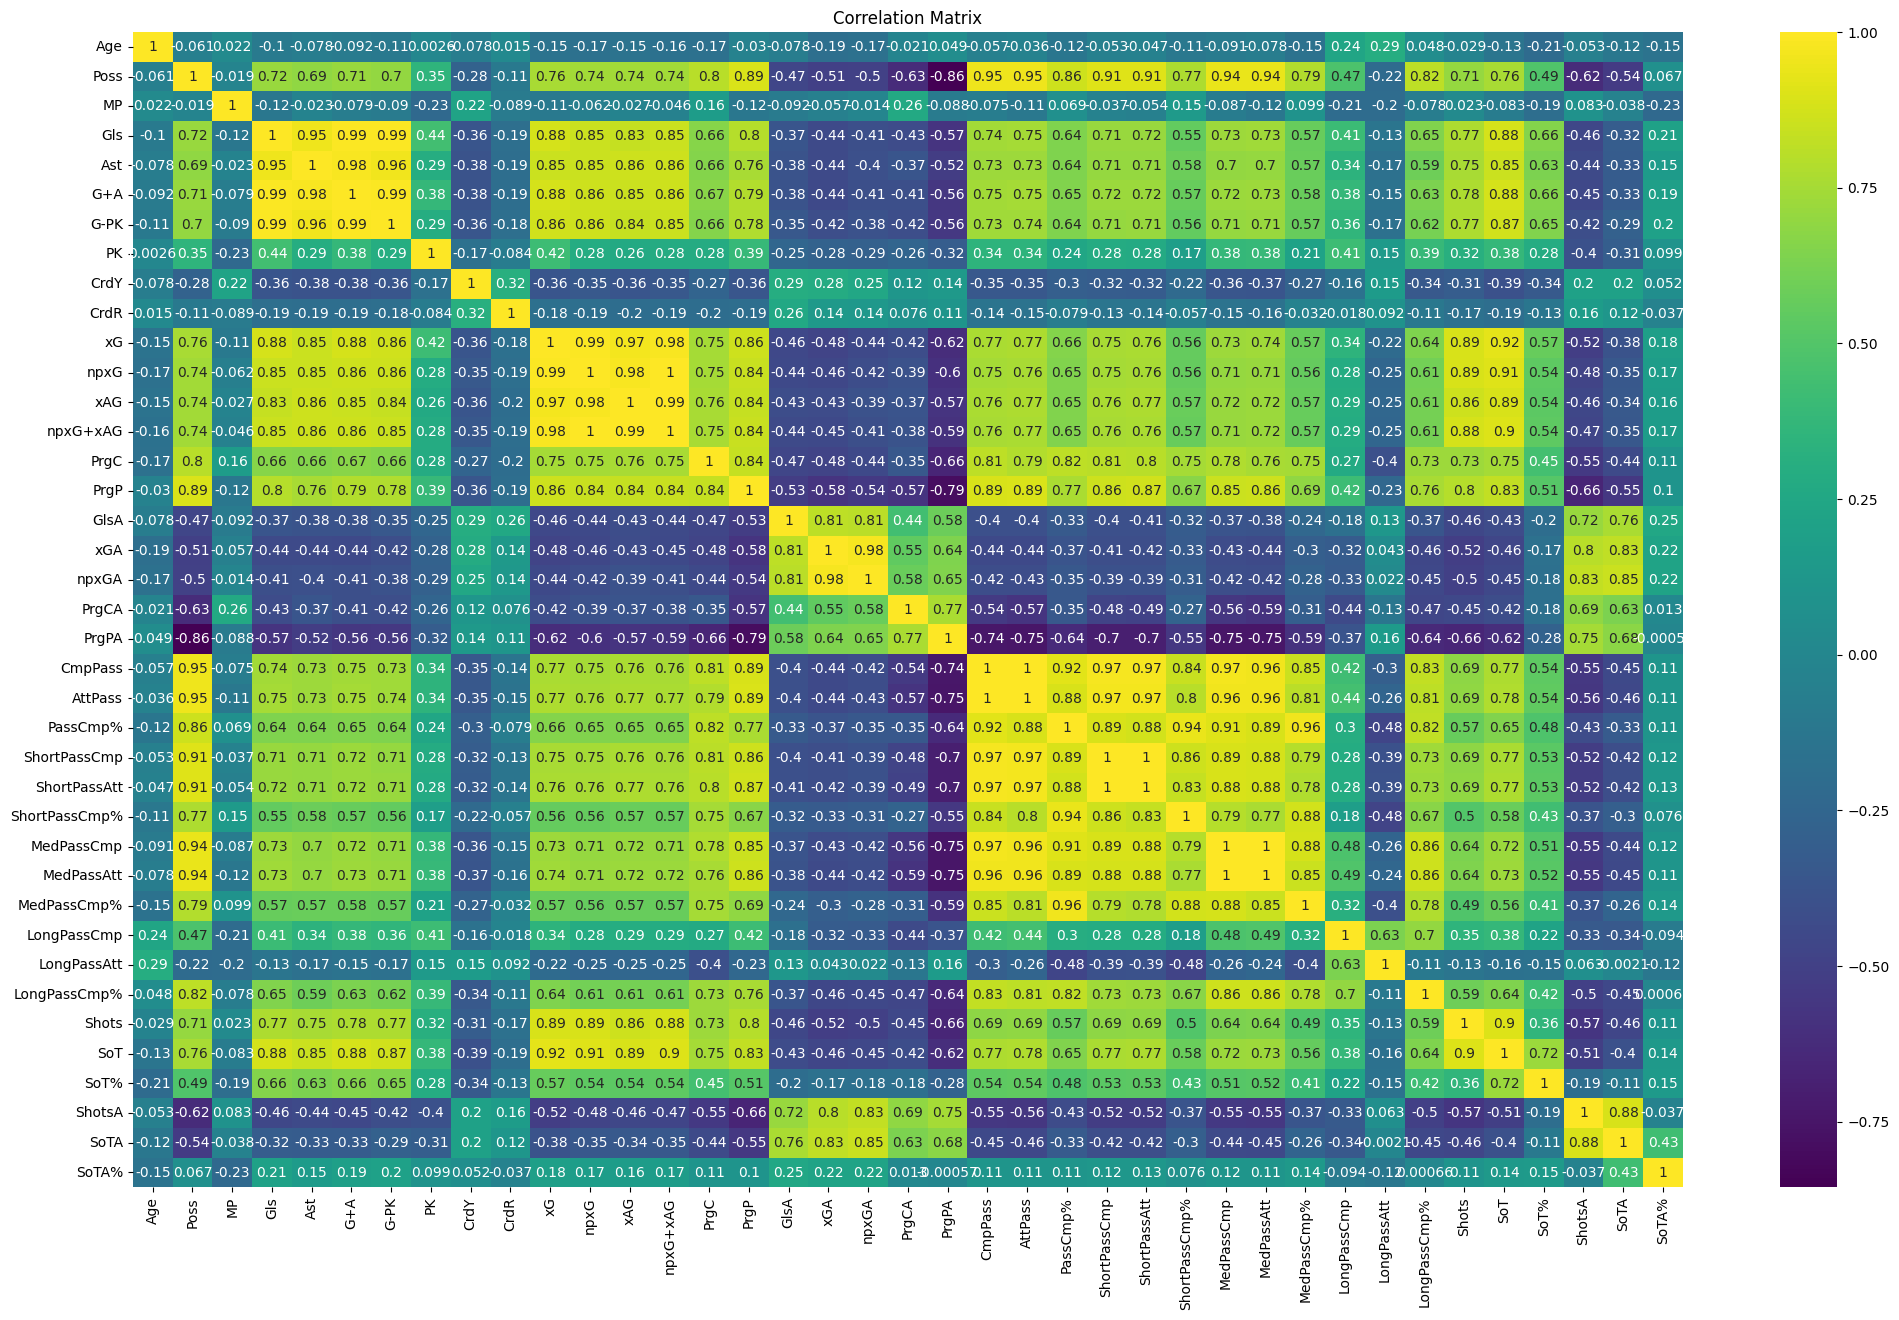

In [36]:
plt.figure(figsize=(25, 15))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [37]:
df.columns

Index(['Rk', 'Squad', 'Comp', '# Pl', 'Age', 'Poss', 'MP', 'Gls', 'Ast', 'G+A',
       'G-PK', 'PK', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'GlsA', 'xGA', 'npxGA', 'PrgCA', 'PrgPA', 'CmpPass', 'AttPass',
       'PassCmp%', 'ShortPassCmp', 'ShortPassAtt', 'ShortPassCmp%',
       'MedPassCmp', 'MedPassAtt', 'MedPassCmp%', 'LongPassCmp', 'LongPassAtt',
       'LongPassCmp%', 'Shots', 'SoT', 'SoT%', 'ShotsA', 'SoTA', 'SoTA%'],
      dtype='object')

In [38]:
df.drop(['Rk', '# Pl'], axis=1, inplace=True)

In [39]:
df.columns

Index(['Squad', 'Comp', 'Age', 'Poss', 'MP', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'GlsA',
       'xGA', 'npxGA', 'PrgCA', 'PrgPA', 'CmpPass', 'AttPass', 'PassCmp%',
       'ShortPassCmp', 'ShortPassAtt', 'ShortPassCmp%', 'MedPassCmp',
       'MedPassAtt', 'MedPassCmp%', 'LongPassCmp', 'LongPassAtt',
       'LongPassCmp%', 'Shots', 'SoT', 'SoT%', 'ShotsA', 'SoTA', 'SoTA%'],
      dtype='object')

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [41]:
features = df[['Poss', 'CmpPass', 'PassCmp%', 'ShortPassCmp%', 'MedPassCmp%', 'LongPassCmp%', 'Shots', 'SoT', 'SoTA', 'xG', 'PrgC', 'PrgP', 'xGA']]

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [119]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=12, random_state=42)

In [120]:
df['Cluster'] = kmeans.labels_
df.head(15)

,Squad,Comp,Age,Poss,MP,Gls,Ast,G+A,G-PK,PK,...,LongPassAtt,LongPassCmp%,Shots,SoT,SoT%,ShotsA,SoTA,SoTA%,Cluster,Playing_Style
0,Alavés,es La Liga,27.1,43.8,20,1.20,0.60,1.80,1.00,0.20,...,74.8,46.8,10.6,3.30,31.1,9.95,3.70,37.2,9,Route One (Defensive)
1,Angers,fr Ligue 1,28.1,42.8,18,1.11,0.72,1.83,0.94,0.17,...,58.1,51.3,10.1,3.28,32.6,12.80,5.39,42.0,8,Park the Bus
2,Arsenal,eng Premier League,26.4,55.5,22,1.86,1.45,3.32,1.77,0.09,...,56.8,52.8,13.9,4.86,35.0,10.40,3.23,31.0,2,Balanced Attack
3,Aston Villa,eng Premier League,27.6,49.7,22,1.45,1.14,2.59,1.36,0.09,...,53.8,54.6,12.4,3.86,31.1,11.80,4.05,34.2,7,Pragmatic Attack
4,Atalanta,it Serie A,27.3,56.4,21,2.14,1.52,3.67,2.00,0.14,...,66.2,60.7,14.8,5.19,35.0,10.20,3.90,38.3,2,Balanced Attack
5,Athletic Club,es La Liga,27.4,47.4,20,1.55,1.25,2.80,1.50,0.05,...,70.2,49.8,11.7,4.00,34.3,8.40,2.75,32.7,7,Pragmatic Attack
6,Atlético Madrid,es La Liga,29.1,52.7,20,1.70,1.40,3.10,1.65,0.05,...,66.5,57.5,12.0,4.55,37.9,9.85,2.80,28.4,7,Pragmatic Attack
7,Augsburg,de Bundesliga,27.3,42.6,18,1.17,0.72,1.89,1.11,0.06,...,67.7,49.0,11.8,3.39,28.8,13.70,4.44,32.5,8,Park the Bus
8,Auxerre,fr Ligue 1,26.5,42.6,18,1.33,0.94,2.28,1.22,0.11,...,73.7,50.7,11.3,4.17,36.8,13.30,5.06,38.1,0,Park the Bus
9,Barcelona,es La Liga,25.0,66.8,20,2.60,1.85,4.45,2.45,0.15,...,65.6,65.7,16.9,6.25,37.1,8.65,3.20,37.0,10,Dominant Possession


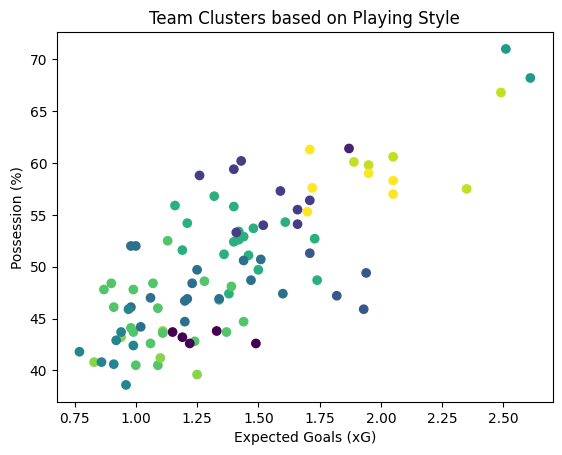

In [121]:
plt.scatter(df['xG'], df['Poss'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Possession (%)')
plt.title('Team Clusters based on Playing Style')
plt.show()

In [122]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(cluster_centers)

        Poss   CmpPass  PassCmp%  ShortPassCmp%  MedPassCmp%  LongPassCmp%  \
0  -1.003868 -0.993905 -1.336709      -1.816066    -1.104851     -0.432428   
1   1.673930  2.012340  1.922597       1.638701     1.639367      1.781879   
2   0.961941  0.875469  1.132840       1.001617     1.158119      1.159176   
3  -0.229335 -0.180716 -0.018023       0.114539    -0.013776     -0.566109   
4  -0.275875 -0.139612  0.031857       0.066153     0.008266     -0.198201   
5  -1.164433 -1.057742 -0.926958      -0.670223    -0.753558     -1.075983   
6   2.879087  3.367936  2.074573       1.820149     1.953465      2.638809   
7   0.382321  0.253566  0.354697       0.330142     0.287679      0.387603   
8  -0.645880 -0.620793 -0.590241      -0.471824    -0.429672     -0.594974   
9  -1.218445 -1.379557 -1.897852      -1.758003    -2.348015     -1.333919   
10  1.609263  1.603648  1.389511       1.297579     1.169875      1.583071   
11  1.186479  0.997508  0.858763       0.725413     0.779733    

In [123]:
cluster_styles = {
    0: 'Park the Bus',
    1: 'Possession-Based',
    2: 'Balanced Attack',
    3: 'Counter-Attack',
    4: 'Route One',
    5: 'Set-Piece Oriented',
    6: 'Possession-Based',
    7: 'Pragmatic Attack',
    8: 'Park the Bus',
    9: 'Route One (Defensive)',
    10: 'Dominant Possession',
    11: 'Mixed Attack'
}

df['Playing_Style'] = df['Cluster'].map(cluster_styles)

In [124]:
import pandas as pd
from IPython.display import display

display(df[['Squad', 'Playing_Style', 'Cluster']])

,Squad,Playing_Style,Cluster
0,Alavés,Route One (Defensive),9
1,Angers,Park the Bus,8
2,Arsenal,Balanced Attack,2
3,Aston Villa,Pragmatic Attack,7
4,Atalanta,Balanced Attack,2
...,...,...,...
91,Villarreal,Pragmatic Attack,7
92,Werder Bremen,Pragmatic Attack,7
93,West Ham,Route One,4
94,Wolfsburg,Park the Bus,0


In [125]:
df[['Squad', 'Playing_Style', 'Cluster']].to_csv('top5_playingstyles.csv', index=False)